## 1. SQL

In [ ]:
https://duckdb.org/2023/04/14/h2oai.html

In [2]:
import polars as pl

# 최대 100행까지 잘리지 않고 출력되도록 설정
cfg = pl.Config()
cfg.set_tbl_rows(100)

polars.config.Config

In [3]:
df = pl.read_csv("../dataset/emp.csv")

df.head()

First Name,Gender,Start Date,Last Login Time,Salary,Bonus,Senior Management,Team
str,str,str,str,i64,f64,bool,str
"""Douglas""","""Male""","""8/6/1993""","""12:42 PM""",97308,6.945,true,"""Marketing"""
"""Thomas""","""Male""","""3/31/1996""","""6:53 AM""",61933,4.17,true,null
"""Maria""","""Female""","""4/23/1993""","""11:17 AM""",130590,11.858,false,"""Finance"""
"""Jerry""","""Male""","""3/4/2005""","""1:00 PM""",138705,9.34,true,"""Finance"""
"""Larry""","""Male""","""1/24/1998""","""4:47 PM""",101004,1.389,true,"""Client Services"""


In [65]:
df.head()

First Name,Gender,Start Date,Last Login Time,Salary,Bonus,Senior Management,Team
str,str,date,time,i32,f64,bool,str
"""Douglas""","""Male""",1993-08-06,12:42:00,97308,6.945,true,"""Marketing"""
"""Thomas""","""Male""",1996-03-31,06:53:00,61933,4.17,true,null
"""Maria""","""Female""",1993-04-23,11:17:00,130590,11.858,false,"""Finance"""
"""Jerry""","""Male""",2005-03-04,13:00:00,138705,9.34,true,"""Finance"""
"""Larry""","""Male""",1998-01-24,16:47:00,101004,1.389,true,"""Client Services"""


In [68]:
# dataframe에 대해 SQL로 조회하기

df.sql("SELECT * FROM self LIMIT 5")

pl.sql("SELECT * FROM df LIMIT 5").collect()

First Name,Gender,Start Date,Last Login Time,Salary,Bonus,Senior Management,Team
str,str,date,time,i32,f64,bool,str
"""Douglas""","""Male""",1993-08-06,12:42:00,97308,6.945,true,"""Marketing"""
"""Thomas""","""Male""",1996-03-31,06:53:00,61933,4.17,true,null
"""Maria""","""Female""",1993-04-23,11:17:00,130590,11.858,false,"""Finance"""
"""Jerry""","""Male""",2005-03-04,13:00:00,138705,9.34,true,"""Finance"""
"""Larry""","""Male""",1998-01-24,16:47:00,101004,1.389,true,"""Client Services"""


In [72]:
# SQLContext 객체 생성

ctx = pl.SQLContext(
    register_globals=False, # 해당 메모리에 있는 dataframe을 다 테이블로 등록하는 설정
    eager=True # 지연 평가(lazy evaluation) 대신 즉시 실행(eager evaluation)을 사용할지 여부를 설정
)

In [73]:
# 해당 객체 안에 있는 테이블 확인

ctx.tables()

[]

In [74]:
# 객체에 테이블 등록

tp = pl.read_csv("../dataset/trainer_pokemon.csv")
pk = pl.read_csv("../dataset/pokemon.csv")

ctx.register_many(
    trainer_pokemon=tp, # 테이블 이름 : DF 이름
    pokemon=pk
)

ctx.tables()

['pokemon', 'trainer_pokemon']

In [75]:
# 등록된 테이블 조회

with ctx:
    # ctx._eager_execution=True
    pk = ctx.execute("SELECT type1, COUNT(type1) AS cnt FROM pokemon GROUP BY type1 ORDER BY cnt DESC")
    display(pk)

type1,cnt
str,u32
"""Water""",46
"""Normal""",37
"""Bug""",22
"""Grass""",21
"""Fire""",20
"""Psychic""",15
"""Electric""",15
"""Poison""",15
"""Rock""",13


In [76]:
with pl.SQLContext(
    register_globals=True,
    eager=True # collect를 사용하지 않아도 되는 DF 타입으로 바로 읽음
    ) as ctx:
    tdf = ctx.execute("SELECT * FROM tp LIMIT 5")
    display(tdf)

id,trainer_id,pokemon_id,level,experience_point,current_health,catch_date,catch_datetime,location,status
i64,i64,i64,i64,i64,i64,str,str,str,str
1,7,25,42,2500,75,"""2024-02-14""","""2024-02-14 5:27""","""Seoul""","""Active"""
2,15,6,56,4300,120,"""2024-03-10""","""2024-03-10 20:27""","""Busan""","""Active"""
3,4,12,21,800,40,"""2024-01-05""","""2024-01-05 14:28""","""Incheon""","""Active"""
4,12,19,39,2100,95,"""2024-02-28""","""2024-02-28 22:39""","""Gwangju""","""Active"""
5,1,143,70,9500,160,"""2024-05-22""","""2024-05-22 20:58""","""Daejeon""","""Active"""


## 2. PARTITIONING

In [ ]:
# 특정 컬럼을 기준으로 파티션 나누어 출력

df.partition_by('Gender')

[shape: (424, 8)
 ┌─────────────┬────────┬────────────┬──────────────┬────────┬────────┬──────────────┬──────────────┐
 │ First Name  ┆ Gender ┆ Start Date ┆ Last Login   ┆ Salary ┆ Bonus  ┆ Senior       ┆ Team         │
 │ ---         ┆ ---    ┆ ---        ┆ Time         ┆ ---    ┆ ---    ┆ Management   ┆ ---          │
 │ str         ┆ str    ┆ date       ┆ ---          ┆ i32    ┆ f64    ┆ ---          ┆ str          │
 │             ┆        ┆            ┆ time         ┆        ┆        ┆ bool         ┆              │
 ╞═════════════╪════════╪════════════╪══════════════╪════════╪════════╪══════════════╪══════════════╡
 │ Douglas     ┆ Male   ┆ 1993-08-06 ┆ 12:42:00     ┆ 97308  ┆ 6.945  ┆ true         ┆ Marketing    │
 │ Thomas      ┆ Male   ┆ 1996-03-31 ┆ 06:53:00     ┆ 61933  ┆ 4.17   ┆ true         ┆ null         │
 │ Jerry       ┆ Male   ┆ 2005-03-04 ┆ 13:00:00     ┆ 138705 ┆ 9.34   ┆ true         ┆ Finance      │
 │ Larry       ┆ Male   ┆ 1998-01-24 ┆ 16:47:00     ┆ 101004 ┆ 1.

In [ ]:
battle
  └── yyyy=2024
       └── mm=10
           ├── dd=01
           │   └── battle.parquet
           ├── dd=02
           │   └── battle.parquet
           ├── dd=03
           │   └── battle.parquet
           └── dd=04
               └── battle.parquet

In [4]:
battle = pl.read_parquet(
    source='../dataset/parquet_partition/battle/',
    hive_partitioning=True
    )

battle.columns

['id',
 'player1_id',
 'player2_id',
 'winner_id',
 'battle_date',
 'battle_datetime',
 'battle_timestamp',
 'yyyy',
 'mm',
 'dd']

In [83]:
battle.write_parquet(
    file="test_path",
    partition_by=['yyyy','mm','dd']
    )

In [84]:
import pandas as pd

aaa = battle.to_pandas()

In [ ]:
aaa.to_parquet(
    "hahaha",
    partition_cols=['yyyy','mm','dd']
    )

## 3. Lazy Frame

In [19]:
lf = pl.scan_csv("../dataset/emp.csv")

type(lf.collect())

polars.dataframe.frame.DataFrame

In [16]:
lf.select(pl.first())

In [9]:
aa = dir(df)
bb = dir(lf)

print(set(bb) - set(aa))

{'show_graph', '_fetch', '_from_pyldf', '_ldf', 'explain', 'collect_async', 'sink_ipc', '_set_sink_optimizations', 'sink_parquet', 'fetch', 'collect', 'with_context', 'profile', 'sink_ndjson', 'first', '_scan_python_function', 'sink_csv', 'inspect', '_comparison_error', 'map_batches', 'cache', 'last'}


In [ ]:
show_graph
explain
sink_csv, sink_parquet
fetch
profile
inspect


In [40]:
lazy_df = lf.group_by('Team').agg(
    cnt = pl.count('Team'),
    max_sal = pl.max('Salary'),
    mean_sal = pl.mean('Salary'),
    min_sal = pl.min('Salary'),
    mean_bonus = pl.mean('Bonus'),
    ).sort('mean_sal', descending=True)

In [45]:
lf.collect_schema()

Schema([('First Name', String),
        ('Gender', String),
        ('Start Date', String),
        ('Last Login Time', String),
        ('Salary', Int64),
        ('Bonus', Float64),
        ('Senior Management', Boolean),
        ('Team', String)])

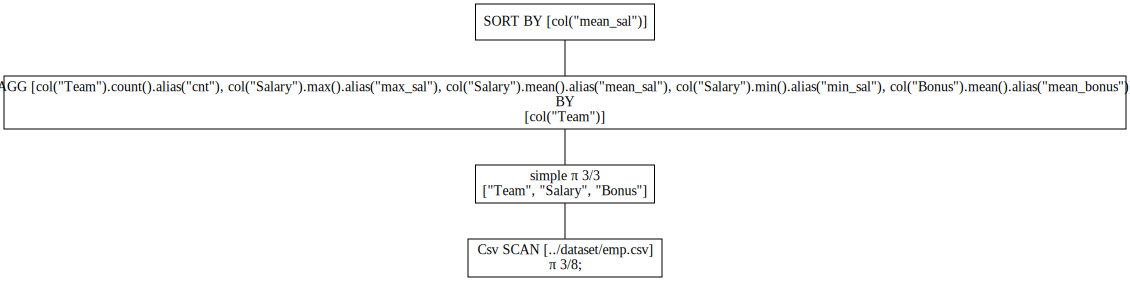

In [54]:
lazy_df.show_graph(
    # figsize=(5,16)
    output_path="graph.pdf"
    )

In [48]:
print(lazy_df.explain())

SORT BY [col("mean_sal")]
  AGGREGATE
  	[col("Team").count().alias("cnt"), col("Salary").max().alias("max_sal"), col("Salary").mean().alias("mean_sal"), col("Salary").min().alias("min_sal"), col("Bonus").mean().alias("mean_bonus")] BY [col("Team")] FROM
    simple π 3/3 ["Team", "Salary", "Bonus"]
      Csv SCAN [../dataset/emp.csv]
      PROJECT 3/8 COLUMNS


In [ ]:
# 결과를 CSV 파일로 저장
lazy_df.sink_csv("output.csv")

# 결과를 Parquet 파일로 저장
lazy_df.sink_parquet("output.parquet")


In [57]:
lazy_df.fetch(10)


C:\Users\YEIN\AppData\Local\Temp\ipykernel_2220\2761988666.py:1: DeprecationWarning: `LazyFrame.fetch` is deprecated. `LazyFrame.fetch` is deprecated; use `LazyFrame.collect` instead, in conjunction with a call to `head`.
  type(lazy_df.fetch(10))


polars.dataframe.frame.DataFrame

In [51]:
lazy_df.profile()

(shape: (11, 6)
 ┌──────────────────────┬─────┬─────────┬──────────────┬─────────┬────────────┐
 │ Team                 ┆ cnt ┆ max_sal ┆ mean_sal     ┆ min_sal ┆ mean_bonus │
 │ ---                  ┆ --- ┆ ---     ┆ ---          ┆ ---     ┆ ---        │
 │ str                  ┆ u32 ┆ i64     ┆ f64          ┆ i64     ┆ f64        │
 ╞══════════════════════╪═════╪═════════╪══════════════╪═════════╪════════════╡
 │ Engineering          ┆ 92  ┆ 147362  ┆ 94269.195652 ┆ 36946   ┆ 10.462989  │
 │ Finance              ┆ 102 ┆ 149908  ┆ 92219.480392 ┆ 35381   ┆ 10.186873  │
 │ Sales                ┆ 94  ┆ 149654  ┆ 92173.43617  ┆ 35802   ┆ 10.116915  │
 │ Business Development ┆ 101 ┆ 147417  ┆ 91866.316832 ┆ 36844   ┆ 10.572376  │
 │ Human Resources      ┆ 91  ┆ 149903  ┆ 90944.527473 ┆ 35203   ┆ 9.993879   │
 │ null                 ┆ 0   ┆ 148291  ┆ 90763.139535 ┆ 37919   ┆ 10.384395  │
 │ Marketing            ┆ 98  ┆ 149456  ┆ 90435.591837 ┆ 36643   ┆ 10.353449  │
 │ Legal                

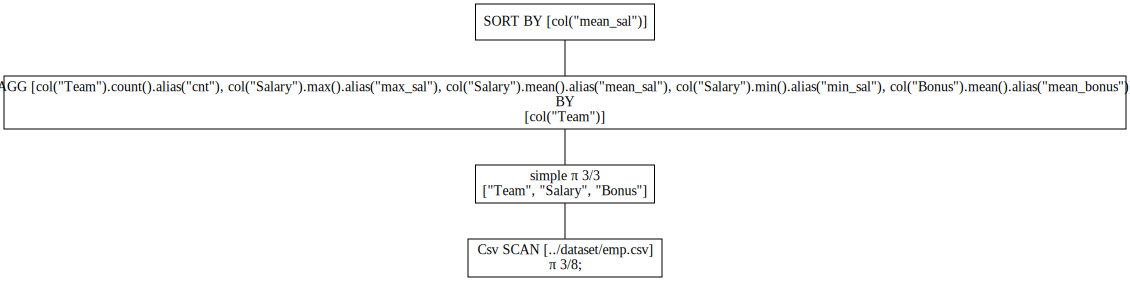

In [35]:
lazy_df.show_graph()

In [ ]:
lf.filter(pl.col("Salary") > 50000).show_graph()

ColumnNotFoundError: unable to find column "Salary"; valid columns: ["a", "b", "c"]

Resolved plan until failure:

	---> FAILED HERE RESOLVING 'filter' <---
DF ["a", "b", "c"]; PROJECT */3 COLUMNS; SELECTION: None

In [5]:
lf.filter(pl.col("Salary") > 50000).inspect()

In [6]:
lf.filter(pl.col("Salary") > 50000).profile()

(shape: (854, 8)
 ┌────────────┬────────┬────────────┬───────────────┬────────┬────────┬──────────────┬──────────────┐
 │ First Name ┆ Gender ┆ Start Date ┆ Last Login    ┆ Salary ┆ Bonus  ┆ Senior       ┆ Team         │
 │ ---        ┆ ---    ┆ ---        ┆ Time          ┆ ---    ┆ ---    ┆ Management   ┆ ---          │
 │ str        ┆ str    ┆ str        ┆ ---           ┆ i64    ┆ f64    ┆ ---          ┆ str          │
 │            ┆        ┆            ┆ str           ┆        ┆        ┆ bool         ┆              │
 ╞════════════╪════════╪════════════╪═══════════════╪════════╪════════╪══════════════╪══════════════╡
 │ Douglas    ┆ Male   ┆ 8/6/1993   ┆ 12:42 PM      ┆ 97308  ┆ 6.945  ┆ true         ┆ Marketing    │
 │ Thomas     ┆ Male   ┆ 3/31/1996  ┆ 6:53 AM       ┆ 61933  ┆ 4.17   ┆ true         ┆ null         │
 │ Maria      ┆ Female ┆ 4/23/1993  ┆ 11:17 AM      ┆ 130590 ┆ 11.858 ┆ false        ┆ Finance      │
 │ Jerry      ┆ Male   ┆ 3/4/2005   ┆ 1:00 PM       ┆ 138705 ┆ 9.